In [33]:
# IMPORT NECESSARY LIBRARIES AND DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import capstone_group10_utility as uti
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Import Weather Data Set

In [34]:
#import data set into variable df

#df = pd.read_csv('/Northeastern/Fall 2021/ALY6140 Analytics Systems Technology/Capstone/BostonClimate.csv')

#df.head()

In [35]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df = pd.read_csv(io.BytesIO(uploaded['BostonClimate.csv']))

In [108]:
url='https://drive.google.com/file/d/1ou-7WCky9Ig2dvLqU_V_60nw-I6Va-TY/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.head()

,NAME,DATE,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed,Fog,Thunder,Hail,SmokeHaze,Mist,Rain,Snow,Wind_Cat,Rain_Cat
0,"BOSTON, MA US",1/1/1990,21.92,1450.0,1303.0,0.06,0.0,0.0,NaN,52.0,27.0,247.0,44.7,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Strong Wind,Light Rain
1,"BOSTON, MA US",1/2/1990,17.67,2350.0,1051.0,0.00,0.0,0.0,NaN,40.0,26.0,538.0,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain
2,"BOSTON, MA US",1/3/1990,10.74,2350.0,159.0,0.00,0.0,0.0,NaN,49.0,30.0,534.0,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Light Wind,No Rain
3,"BOSTON, MA US",1/4/1990,15.21,1751.0,1941.0,0.00,0.0,0.0,NaN,48.0,32.0,32.0,33.3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Moderate Wind,No Rain
4,"BOSTON, MA US",1/5/1990,13.20,1050.0,428.0,0.00,0.0,0.0,NaN,47.0,33.0,499.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain


In [37]:
df.head()

,NAME,DATE,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed,Fog,Thunder,Hail,SmokeHaze,Mist,Rain,Snow,Wind_Cat,Rain_Cat
0,"BOSTON, MA US",1/1/1990,21.92,1450.0,1303.0,0.06,0.0,0.0,NaN,52.0,27.0,247.0,44.7,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Strong Wind,Light Rain
1,"BOSTON, MA US",1/2/1990,17.67,2350.0,1051.0,0.00,0.0,0.0,NaN,40.0,26.0,538.0,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain
2,"BOSTON, MA US",1/3/1990,10.74,2350.0,159.0,0.00,0.0,0.0,NaN,49.0,30.0,534.0,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Light Wind,No Rain
3,"BOSTON, MA US",1/4/1990,15.21,1751.0,1941.0,0.00,0.0,0.0,NaN,48.0,32.0,32.0,33.3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Moderate Wind,No Rain
4,"BOSTON, MA US",1/5/1990,13.20,1050.0,428.0,0.00,0.0,0.0,NaN,47.0,33.0,499.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain


In [38]:
df.head()

,NAME,DATE,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed,Fog,Thunder,Hail,SmokeHaze,Mist,Rain,Snow,Wind_Cat,Rain_Cat
0,"BOSTON, MA US",1/1/1990,21.92,1450.0,1303.0,0.06,0.0,0.0,NaN,52.0,27.0,247.0,44.7,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Strong Wind,Light Rain
1,"BOSTON, MA US",1/2/1990,17.67,2350.0,1051.0,0.00,0.0,0.0,NaN,40.0,26.0,538.0,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain
2,"BOSTON, MA US",1/3/1990,10.74,2350.0,159.0,0.00,0.0,0.0,NaN,49.0,30.0,534.0,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Light Wind,No Rain
3,"BOSTON, MA US",1/4/1990,15.21,1751.0,1941.0,0.00,0.0,0.0,NaN,48.0,32.0,32.0,33.3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Moderate Wind,No Rain
4,"BOSTON, MA US",1/5/1990,13.20,1050.0,428.0,0.00,0.0,0.0,NaN,47.0,33.0,499.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate Wind,No Rain


# Shape of Data Set

In [39]:
df.shape

(11594, 22)

# Info of Data Set

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   11594 non-null  object 
 1   DATE                   11594 non-null  object 
 2   AvgWindSpd             11592 non-null  float64
 3   TimeFastestOneMinWind  7964 non-null   float64
 4   PeakGustTime_HHMM      7200 non-null   float64
 5   Precipitation          11590 non-null  float64
 6   SnowInch               11592 non-null  float64
 7   SnowDepth              4404 non-null   float64
 8   AvgTemp                5772 non-null   float64
 9   MaxTemp                11592 non-null  float64
 10  MinTemp                11592 non-null  float64
 11  TotalSunshine_Minutes  2620 non-null   float64
 12  PeakWindSpeed          2276 non-null   float64
 13  Fog                    4453 non-null   float64
 14  Thunder                514 non-null    float64
 15  Ha

# Describe Data Set

In [41]:
df.describe()

,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed,Fog,Thunder,Hail,SmokeHaze,Mist,Rain,Snow
count,11592.000000,7964.000000,7200.000000,11590.000000,11592.000000,4404.000000,5772.000000,11592.000000,11592.000000,2620.000000,2276.000000,4453.0,514.0,386.0,1187.0,2329.0,3598.0,1003.0
mean,11.284974,1425.367278,1364.176389,0.120149,0.131763,0.511807,52.818780,59.853347,44.846101,369.302290,27.460457,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.782647,795.635022,603.980477,0.330887,0.929131,2.241718,17.214188,18.248084,16.584639,302.170358,8.917965,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-9.000000,0.000000,8.100000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,8.500000,1052.000000,1027.000000,0.000000,0.000000,0.000000,40.000000,45.000000,32.000000,8.750000,20.800000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,10.740000,1450.000000,1434.000000,0.000000,0.000000,0.000000,53.000000,60.000000,45.000000,392.000000,26.400000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,13.420000,1753.000000,1757.000000,0.050000,0.000000,0.000000,67.000000,75.000000,59.000000,626.250000,32.200000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,38.030000,9999.000000,2359.000000,6.110000,23.600000,31.000000,90.000000,103.000000,83.000000,917.000000,80.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
df.isnull().sum()

NAME                         0
DATE                         0
AvgWindSpd                   2
TimeFastestOneMinWind     3630
PeakGustTime_HHMM         4394
Precipitation                4
SnowInch                     2
SnowDepth                 7190
AvgTemp                   5822
MaxTemp                      2
MinTemp                      2
TotalSunshine_Minutes     8974
PeakWindSpeed             9318
Fog                       7141
Thunder                  11080
Hail                     11208
SmokeHaze                10407
Mist                      9265
Rain                      7996
Snow                     10591
Wind_Cat                     0
Rain_Cat                     4
dtype: int64

# Replace null values with 0

In [43]:
df['Fog']=df['Fog'].replace(np.nan,'0')
df['Thunder']=df['Thunder'].replace(np.nan,'0')
df['Hail']=df['Hail'].replace(np.nan,'0')
df['SmokeHaze']=df['SmokeHaze'].replace(np.nan,'0')
df['Mist']=df['Mist'].replace(np.nan,'0')
df['Rain']=df['Rain'].replace(np.nan,'0')
df['Snow']=df['Snow'].replace(np.nan,'0')

# Find number of Null in each column

In [44]:
df.isnull().sum()

NAME                        0
DATE                        0
AvgWindSpd                  2
TimeFastestOneMinWind    3630
PeakGustTime_HHMM        4394
Precipitation               4
SnowInch                    2
SnowDepth                7190
AvgTemp                  5822
MaxTemp                     2
MinTemp                     2
TotalSunshine_Minutes    8974
PeakWindSpeed            9318
Fog                         0
Thunder                     0
Hail                        0
SmokeHaze                   0
Mist                        0
Rain                        0
Snow                        0
Wind_Cat                    0
Rain_Cat                    4
dtype: int64

In [45]:
df['Precipitation'].fillna(value=df['Precipitation'].mean(), inplace=True)
df['SnowInch'].fillna(value=df['SnowInch'].mean(), inplace=True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace=True)
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace=True)
df['AvgWindSpd'].fillna(value=df['AvgWindSpd'].mean(), inplace=True)
df['Rain_Cat'].fillna(value=df['Rain_Cat'].mode(), inplace=True)

In [46]:
df.isnull().sum()

NAME                        0
DATE                        0
AvgWindSpd                  0
TimeFastestOneMinWind    3630
PeakGustTime_HHMM        4394
Precipitation               0
SnowInch                    0
SnowDepth                7190
AvgTemp                  5822
MaxTemp                     0
MinTemp                     0
TotalSunshine_Minutes    8974
PeakWindSpeed            9318
Fog                         0
Thunder                     0
Hail                        0
SmokeHaze                   0
Mist                        0
Rain                        0
Snow                        0
Wind_Cat                    0
Rain_Cat                    4
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   11594 non-null  object 
 1   DATE                   11594 non-null  object 
 2   AvgWindSpd             11594 non-null  float64
 3   TimeFastestOneMinWind  7964 non-null   float64
 4   PeakGustTime_HHMM      7200 non-null   float64
 5   Precipitation          11594 non-null  float64
 6   SnowInch               11594 non-null  float64
 7   SnowDepth              4404 non-null   float64
 8   AvgTemp                5772 non-null   float64
 9   MaxTemp                11594 non-null  float64
 10  MinTemp                11594 non-null  float64
 11  TotalSunshine_Minutes  2620 non-null   float64
 12  PeakWindSpeed          2276 non-null   float64
 13  Fog                    11594 non-null  object 
 14  Thunder                11594 non-null  object 
 15  Ha

# Number of unique values Fastest One Minute Wind

In [48]:
df['TimeFastestOneMinWind'].nunique()

1356

# All Unique Values of Snow Inches

In [49]:
df['SnowInch'].unique()

array([ 0.        ,  0.5       ,  1.8       ,  3.5       ,  1.2       ,
        0.2       ,  4.6       ,  1.1       ,  0.1       ,  5.7       ,
        4.5       ,  0.7       ,  3.6       ,  1.        ,  4.3       ,
        4.2       ,  1.9       ,  0.4       ,  0.3       ,  0.9       ,
        2.8       ,  1.7       ,  0.6       ,  5.4       ,  1.6       ,
        2.9       ,  9.2       ,  6.4       ,  3.        ,  2.2       ,
        0.8       ,  1.5       ,  5.9       ,  8.7       ,  1.4       ,
       12.3       ,  3.1       ,  8.5       ,  2.1       ,  8.        ,
        7.9       ,  7.4       ,  7.2       ,  1.3       ,  6.1       ,
       12.4       ,  5.5       ,  2.3       ,  6.7       ,  2.4       ,
        6.5       ,  3.9       ,  7.7       ,  2.        , 10.6       ,
        5.        , 13.2       ,  3.4       ,  4.9       ,  4.1       ,
       22.4       ,  6.8       ,  2.6       ,  7.8       ,  2.7       ,
        6.        ,  5.6       ,  3.2       ,  6.2       ,  3.3 

# Number of Times It Rained In Boston

In [50]:
df.Rain.value_counts()

0      7996
1.0    3598
Name: Rain, dtype: int64

# Number of Times Wind Speed Exceeded 25 miles per hour

In [51]:
df[df['AvgWindSpd'] > 25].count()

NAME                     37
DATE                     37
AvgWindSpd               37
TimeFastestOneMinWind    28
PeakGustTime_HHMM        23
Precipitation            37
SnowInch                 37
SnowDepth                16
AvgTemp                  12
MaxTemp                  37
MinTemp                  37
TotalSunshine_Minutes    13
PeakWindSpeed            12
Fog                      37
Thunder                  37
Hail                     37
SmokeHaze                37
Mist                     37
Rain                     37
Snow                     37
Wind_Cat                 37
Rain_Cat                 37
dtype: int64

# Bar Plot of Wind Categories
No wind = 0 mph | 
Light Wind = 1-12 mph | 
Moderate Wind = 12 - 18 mph | 
Strong Wind = 18+ mph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Wind Level Categories')

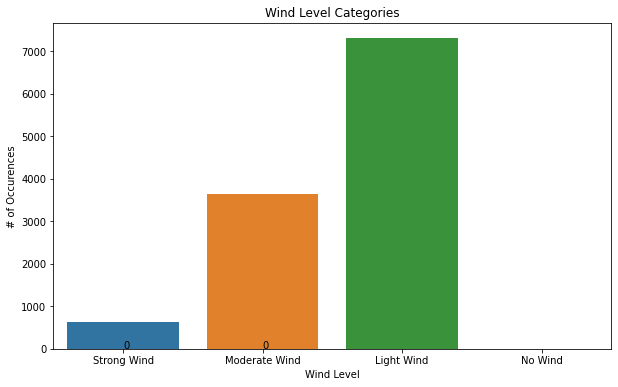

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(df.Wind_Cat);
for v in [0, 1]:
    plt.text(v, (df.Wind_Cat == v).sum(), str((df.Wind_Cat == v).sum()));
plt.xlabel('Wind Level')
plt.ylabel('# of Occurences')
plt.title('Wind Level Categories')

# Bar Plot of Rain Categories
No Rain = 0 inch | Light Rain < .1 inch | Moderate Rain = .1 - .3 inch | Heavy Rain > .3 inch

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rain Level Categories')

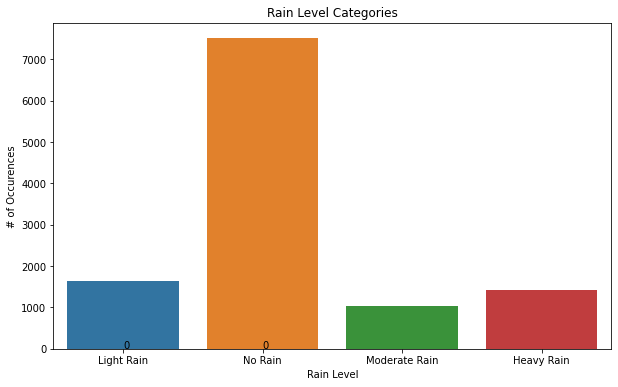

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(df.Rain_Cat);
for v in [0, 1]:
    plt.text(v, (df.Rain_Cat == v).sum(), str((df.Rain_Cat == v).sum()));
plt.xlabel('Rain Level')
plt.ylabel('# of Occurences')
plt.title('Rain Level Categories')

# Number of instances of Snow

In [54]:
df['Snow'].value_counts()

0      10591
1.0     1003
Name: Snow, dtype: int64

# Average for each wind category

In [55]:
df.groupby('Wind_Cat').mean()

,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed
Wind_Cat,,,,,,,,,,,
Light Wind,8.978829,1471.130102,1386.421283,0.090066,0.060829,0.360394,55.451300,62.584348,47.861814,352.464959,21.616801
Moderate Wind,14.272256,1371.087542,1339.127295,0.133331,0.156113,0.603203,49.009434,56.743147,41.044682,396.737034,31.087755
No Wind,0.000000,934.000000,705.000000,0.000000,0.000000,NaN,NaN,81.000000,69.000000,NaN,NaN
Strong Wind,20.670660,1262.697624,1281.699519,0.390456,0.807490,1.283154,39.460674,46.274696,31.955491,329.056701,44.320904


# Average for each rain category 

In [56]:
df.groupby('Rain_Cat').mean()

,AvgWindSpd,TimeFastestOneMinWind,PeakGustTime_HHMM,Precipitation,SnowInch,SnowDepth,AvgTemp,MaxTemp,MinTemp,TotalSunshine_Minutes,PeakWindSpeed
Rain_Cat,,,,,,,,,,,
Heavy Rain,12.987475,1436.117220,1425.684032,0.809993,0.734043,0.749511,52.526773,58.180851,45.374468,94.217822,33.260886
Light Rain,11.076188,1445.813869,1376.231869,0.037764,0.104215,0.580645,52.086250,58.409285,44.553451,225.374005,27.736254
Moderate Rain,11.041132,1469.072222,1409.990798,0.182418,0.295648,0.680798,51.990548,58.577369,45.158607,153.742616,27.397573
No Rain,11.043722,1412.986299,1343.675918,0.000000,0.002144,0.431359,53.126201,60.652550,44.762951,480.106283,26.336308


In [57]:
plt.figure(figsize=(8,5))
tempavg = sns.lineplot(data=df,x='DATE',y='AvgTemp',color='green')
tempavg.tick_params(bottom=False)
tempavg.set(title='Average Temperature 1990 - 2021')

[Text(0.5, 1.0, 'Average Temperature 1990 - 2021')]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f36e8028cb0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f36e8031320> (for post_execute):


KeyboardInterrupt: ignored

[Text(0, 0.5, 'Precipitation (Inches)'),
 Text(0.5, 0, 'Total Sunshine (Minutes)'),
 Text(0.5, 1.0, 'Sunshine versus Precipitation')]

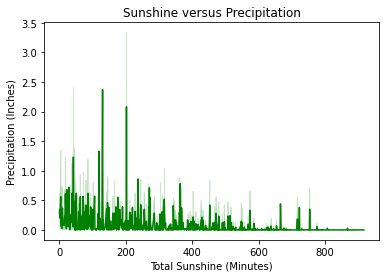

In [58]:
sunp = sns.lineplot(data=df,x='TotalSunshine_Minutes',y='Precipitation',color='green')
sunp.set(title='Sunshine versus Precipitation', xlabel='Total Sunshine (Minutes)', ylabel='Precipitation (Inches)')

In [59]:
myrain = smf.ols(formula='Precipitation ~ TotalSunshine_Minutes + PeakWindSpeed + AvgWindSpd + MaxTemp + MinTemp + SnowInch + Fog + Thunder + Hail + SmokeHaze + Mist + Snow', data = df, missing='drop')
res = myrain.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Precipitation   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     111.6
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.12e-203
Time:                        20:44:13   Log-Likelihood:                -219.32
No. Observations:                2276   AIC:                             462.6
Df Residuals:                    2264   BIC:                             531.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.32

# Clean Up Data for Models

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   11594 non-null  object 
 1   DATE                   11594 non-null  object 
 2   AvgWindSpd             11594 non-null  float64
 3   TimeFastestOneMinWind  7964 non-null   float64
 4   PeakGustTime_HHMM      7200 non-null   float64
 5   Precipitation          11594 non-null  float64
 6   SnowInch               11594 non-null  float64
 7   SnowDepth              4404 non-null   float64
 8   AvgTemp                5772 non-null   float64
 9   MaxTemp                11594 non-null  float64
 10  MinTemp                11594 non-null  float64
 11  TotalSunshine_Minutes  2620 non-null   float64
 12  PeakWindSpeed          2276 non-null   float64
 13  Fog                    11594 non-null  object 
 14  Thunder                11594 non-null  object 
 15  Ha

In [68]:
df.isnull().sum()

NAME                        0
DATE                        0
AvgWindSpd                  0
TimeFastestOneMinWind    3630
PeakGustTime_HHMM        4394
Precipitation               0
SnowInch                    0
SnowDepth                7190
AvgTemp                  5822
MaxTemp                     0
MinTemp                     0
TotalSunshine_Minutes    8974
PeakWindSpeed            9318
Fog                         0
Thunder                     0
Hail                        0
SmokeHaze                   0
Mist                        0
Rain                        0
Snow                        0
Wind_Cat                    0
Rain_Cat                    4
dtype: int64

In [69]:
df['Fog'] = df['Fog'].astype(int)
df['Thunder'] = df['Thunder'].astype(int)
df['Hail'] = df['Hail'].astype(int)
df['SmokeHaze'] = df['SmokeHaze'].astype(int)
df['Mist'] = df['Mist'].astype(int)
df['Rain'] = df['Rain'].astype(int)
df['Snow'] = df['Snow'].astype(int)

In [70]:
dfmodel = df.select_dtypes(exclude=['object'])

In [71]:
dfmodel.drop('TimeFastestOneMinWind', inplace=True, axis=1)
dfmodel.drop('PeakGustTime_HHMM', inplace=True, axis=1)
dfmodel.drop('SnowDepth', inplace=True, axis=1)
dfmodel.drop('AvgTemp', inplace=True, axis=1)
dfmodel.drop('TotalSunshine_Minutes', inplace=True, axis=1)
dfmodel.drop('PeakWindSpeed', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AvgWindSpd     11594 non-null  float64
 1   Precipitation  11594 non-null  float64
 2   SnowInch       11594 non-null  float64
 3   MaxTemp        11594 non-null  float64
 4   MinTemp        11594 non-null  float64
 5   Fog            11594 non-null  int64  
 6   Thunder        11594 non-null  int64  
 7   Hail           11594 non-null  int64  
 8   SmokeHaze      11594 non-null  int64  
 9   Mist           11594 non-null  int64  
 10  Rain           11594 non-null  int64  
 11  Snow           11594 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 1.1 MB


# Train Test Split

In [73]:
y=dfmodel[['Rain']]
x=dfmodel.drop(['Rain'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Linear Regression

In [74]:
# Switch real time to ordinal number time
from datetime import date
x = date(2026,1,1)
d = x.toordinal()
print("Ordinal number of date ",x," is:", d)
print()

x = date(2031,1,1)
d = x.toordinal()
print("Ordinal number of date ",x," is:", d)
print()

x = date(2041,1,1)
d = x.toordinal()
print("Ordinal number of date ",x," is:", d)
print()

x = date(2071,1,1)
d = x.toordinal()
print("Ordinal number of date ",x," is:", d)
print()

Ordinal number of date  2026-01-01  is: 739617

Ordinal number of date  2031-01-01  is: 741443

Ordinal number of date  2041-01-01  is: 745096

Ordinal number of date  2071-01-01  is: 756053



[[]]

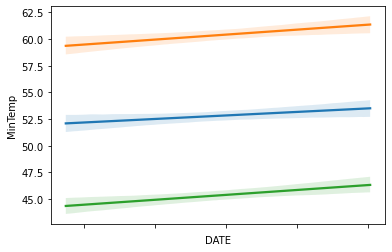

In [75]:
# Data Cleanig for linear regression vs Date
df_lr = df.copy()
df_lr['DATE'] = pd.to_datetime(df_lr['DATE'])
df_lr['DATE'] = df_lr['DATE'].map(dt.datetime.toordinal)
df_lr['DATE'].replace('', np.nan, inplace=True)
df_lr.dropna(subset=['DATE'], inplace=True)
df_lr['AvgTemp'].replace('', np.nan, inplace=True)
df_lr.dropna(subset=['AvgTemp'], inplace=True)
df_lr['MaxTemp'].replace('', np.nan, inplace=True)
df_lr.dropna(subset=['MaxTemp'], inplace=True)
df_lr['MinTemp'].replace('', np.nan, inplace=True)
df_lr.dropna(subset=['MinTemp'], inplace=True)

# Creating Regression Lines
ax1 = sns.regplot(x='DATE',y='AvgTemp',data=df_lr, scatter = False) 
ax1.set(xticklabels=[])
ax2 = sns.regplot(x='DATE',y='MaxTemp',data=df_lr, scatter = False)
ax2.set(xticklabels=[])
ax3 = sns.regplot(x='DATE',y='MinTemp',data=df_lr, scatter = False)
ax3.set(xticklabels=[])




In [76]:
# functions testing predicting attributes via date
def LRM(df, col_name): 
    df_lr = df.copy()
    df_lr['DATE'] = pd.to_datetime(df_lr['DATE'])
    df_lr['DATE'] = df_lr['DATE'].map(dt.datetime.toordinal)
    df_lr['DATE'].replace('', np.nan, inplace=True)
    df_lr.dropna(subset=['DATE'], inplace=True)
    df_lr[col_name].replace('', np.nan, inplace=True)
    df_lr.dropna(subset=[col_name], inplace=True)

    reg = linear_model.LinearRegression()
    reg.fit(df_lr[['DATE']],df_lr[col_name])
    print(f"5 years later: {reg.predict([[739617]])}")
    print(f"10 years later: {reg.predict([[741443]])}")
    print(f"20 years later: {reg.predict([[745096]])}")
    print(f"50 years later: {reg.predict([[756053]])}")
    return sns.lmplot(x='DATE',y=col_name,data=df_lr, scatter = False, fit_reg=True) 

5 years later: [53.76443529]
10 years later: [54.06537396]
20 years later: [54.66741611]
50 years later: [56.47321295]


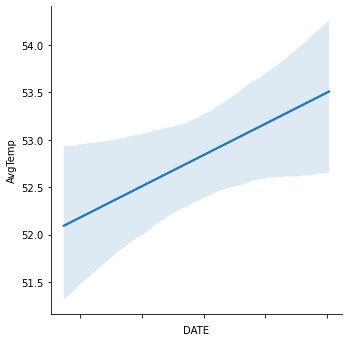

In [77]:
# Predicting for Average Temperature
LRMAvgTemp = LRM(df, "AvgTemp")
LRMAvgTemp.set(xticklabels = [])

5 years later: [61.12476219]
10 years later: [61.44051926]
20 years later: [62.07220633]
50 years later: [63.96692169]


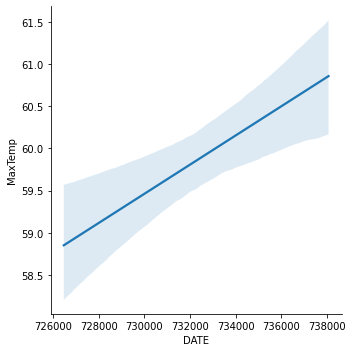

In [78]:
# Prediction for Maximym Temperaure
LRMMaxTemp = LRM(df, "MaxTemp")

5 years later: [46.55934303]
10 years later: [46.98482829]
20 years later: [47.83603183]
50 years later: [50.38917642]


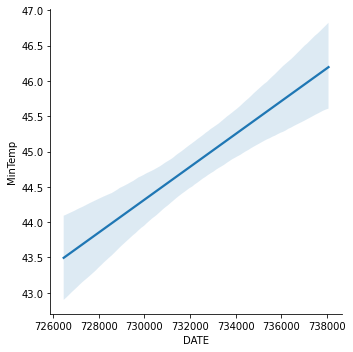

In [79]:
# Prediction for minimum Temperature
LRMMinTemp = LRM(df, "MinTemp")

5 years later: [0.12450695]
10 years later: [0.12558919]
20 years later: [0.12775425]
50 years later: [0.13424825]


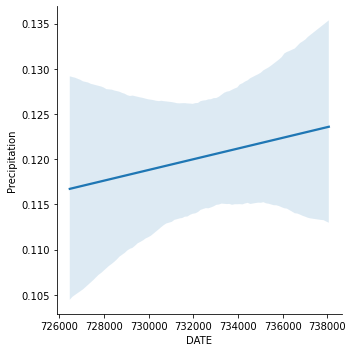

In [80]:
# Prediction for precipitation
LRMPrecipitation = LRM(df, "Precipitation")

5 years later: [10.10506383]
10 years later: [9.81203204]
20 years later: [9.22580799]
50 years later: [7.46745681]


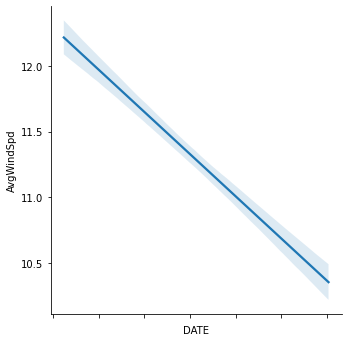

In [81]:
# Prediction for Wind speed
LRMWindSpd = LRM(df, "AvgWindSpd")
LRMWindSpd.set(xticklabels = [])

In [85]:
# # Combined Figure
# fig, (LRMAvgTemp, LRMMaxTemp, LRMMinTemp) = plt.subplots(3)
# fig.suptitle('Linear Model Temp')
# LRMAvgTemp.plot(x, y)
# LRMMaxTemp.plot(x + 1, -y)
# LRMMinTemp.plot(x + 2, -y)

# fig, axs = plt.subplots(3, sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
# axs[0].plot(x, y ** 2)
# axs[1].plot(x, 0.3 * y, 'o')
# axs[2].plot(x, y, '+')

In [86]:
X2 = sm.add_constant(x_train) #this ensures that it adds a constant line to your model
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rain   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     441.4
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:48:59   Log-Likelihood:                -4063.5
No. Observations:                9275   AIC:                             8151.
Df Residuals:                    9263   BIC:                             8237.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0193      0.021     -0.913

# Scatterplots

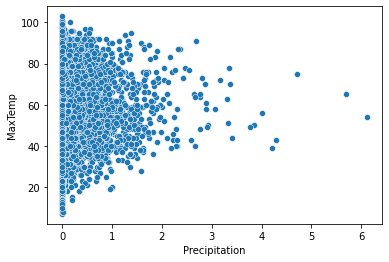

In [87]:
sns.scatterplot(data=dfmodel, x="Precipitation", y="MaxTemp")

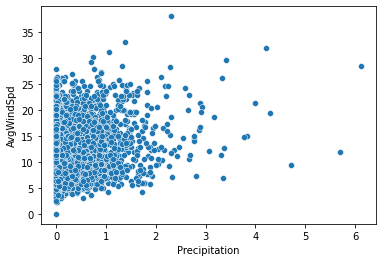

In [88]:
sns.scatterplot(data=dfmodel, x="Precipitation", y="AvgWindSpd")

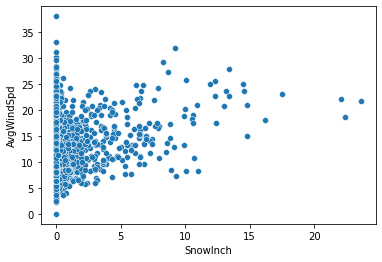

In [89]:
sns.scatterplot(data=dfmodel, x="SnowInch", y="AvgWindSpd")

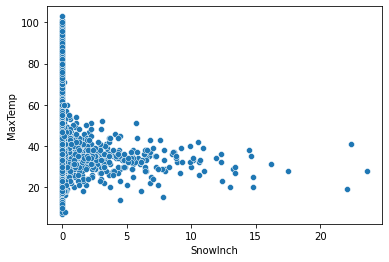

In [90]:
sns.scatterplot(data=dfmodel, x="SnowInch", y="MaxTemp")

# Heat Map

In [91]:
df_corr = dfmodel.corr()

In [92]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

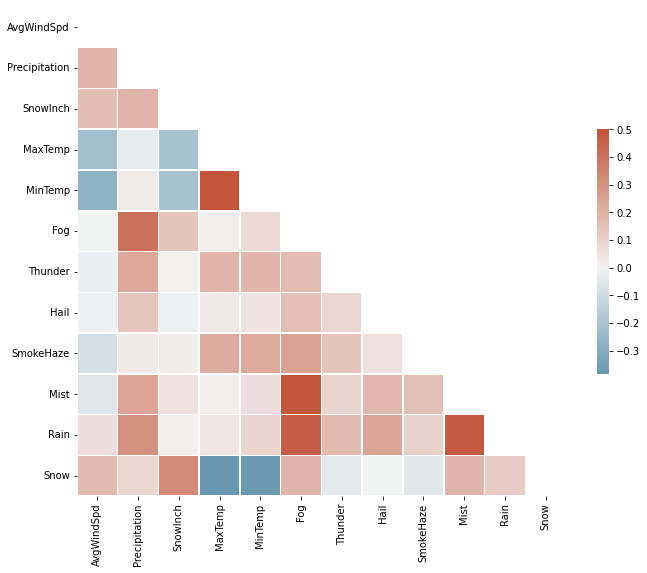

In [93]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Random Forest Classifier

In [94]:
#test out different estimators to see how model improves, test out 10,20,50
rfclass=RandomForestClassifier(n_estimators=500,random_state=0) 
rfclass.fit(x_train,y_train)
rfypred=rfclass.predict(x_test)
#print(accuracy_score(y_test,rfypred))
rfclass.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8344113842173351

# Logistic Regression

In [95]:
feature_cols = ['AvgWindSpd', 'Precipitation', 'SnowInch','MaxTemp','MinTemp']
X = dfmodel[feature_cols] # Features
y = dfmodel.Rain # Target variable

In [96]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [97]:
le = preprocessing.LabelEncoder()
X['AvgWindSpd'] = le.fit_transform(X['AvgWindSpd'].astype('float'))
X['Precipitation'] = le.fit_transform(X['Precipitation'].astype('float'))
X['SnowInch'] = le.fit_transform(X['SnowInch'].astype('float'))
X['MaxTemp'] = le.fit_transform(X['MaxTemp'].astype('float'))
X['MinTemp'] = le.fit_transform(X['MinTemp'].astype('float'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Model Quaility Evaluation
y_pred=logreg.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy Score:
0.7381855812349086
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      2000
           1       0.76      0.23      0.35       899

    accuracy                           0.74      2899
   macro avg       0.75      0.60      0.59      2899
weighted avg       0.74      0.74      0.69      2899

Confusion Matrix:
[[1933   67]
 [ 692  207]]


In [99]:
# Find weight for each variables
print(logreg.coef_)

[[ 0.03107213  2.60003105 -0.16546443 -0.0408544   0.05626305]]


In [100]:
# Example Predicting Rain
logreg.predict([[20,0,0,50,55]])

array([1])

In [101]:
# Example Predicting Rain
logreg.predict([[10.5,0.03,0,55,60]])

array([0])

# Decision Tree

In [102]:
# Data Labeling
df_dt = df.copy().fillna(0)
inputs = df_dt[['Fog','Thunder','Hail','SmokeHaze','Mist','Rain','Snow']].copy()
target = df_dt['Wind_Cat']

from sklearn.preprocessing import LabelEncoder

le_Fog = LabelEncoder()
le_Thunder = LabelEncoder()
le_Hail = LabelEncoder()
le_SmokeHaze = LabelEncoder()
le_Mist = LabelEncoder()
le_Rain = LabelEncoder()
le_Snow = LabelEncoder()
#le_Wind_Cat = LabelEncoder()
# le_Rain_Cat = LabelEncoder()

inputs['Fog_n'] = le_Fog.fit_transform(inputs['Fog'])
inputs['Thunder_n'] = le_Thunder.fit_transform(inputs['Thunder'])
inputs['Hail_n'] = le_Hail.fit_transform(inputs['Hail'])
inputs['SmokeHaze_n'] = le_SmokeHaze.fit_transform(inputs['SmokeHaze'])
inputs['Mist_n'] = le_Mist.fit_transform(inputs['Mist'])
inputs['Rain_n'] = le_Rain.fit_transform(inputs['Rain'])
inputs['Snow_n'] = le_Snow.fit_transform(inputs['Snow'])
#inputs['Wind_Cat_n'] = le_Wind_Cat.fit_transform(inputs['Wind_Cat'])
#inputs['Rain_Cat_n'] = le_Rain_Cat.fit_transform(inputs['Rain_Cat'])

inputs_n = inputs.drop(['Fog','Thunder','Hail','SmokeHaze','Mist','Rain','Snow'], axis = 'columns')
inputs_n 

,Fog_n,Thunder_n,Hail_n,SmokeHaze_n,Mist_n,Rain_n,Snow_n
0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
11589,0,0,0,0,0,0,0
11590,1,0,0,0,0,0,0
11591,1,0,0,0,0,0,0
11592,0,0,0,0,0,0,0


In [103]:
# Decision Tree Model Construction
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
# Model Score
model.score(inputs_n, target)

0.6405037088149043

In [106]:
# Example Prediction
model.predict([[0,1,0,0,0,0,1]])

array(['Strong Wind'], dtype=object)

In [107]:
# Example Prediction
model.predict([[1,1,0,0,1,0,0]])

array(['Light Wind'], dtype=object)